In [6]:
pip install pandas_datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
print('hi')

hi


In [7]:
import pandas_datareader

In [11]:
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()
#import all stocks name
df = pd.read_csv('https://pkgstore.datahub.io/core/nyse-other-listings/nyse-listed_csv/data/3c88fab8ec158c3cd55145243fe5fcdf/nyse-listed_csv.csv')
df_name = df.columns()
m = len(df)
prob = []
#Save Close and name of equity that satisfies the condition
close = []
stock = []

for j in range(m):
  start_date = '2022-01-01'
  df_Stock = pdr.get_data_yahoo(df_name[j], start = start_date)

  price_last = df_Stock['Close'].tail(-1)
  df[df_name[j]] = price_last
  price = df[df_name[j]]

  n = len(price)
  price = price.to_numpy()
  price = np.reshape(price,n)
  price_limit = 100 #dollars

  #For index error
  try:
    if price[-1]*price[-2] > 0 and price[-1] < price_limit:
      #If the theorem is right, go to true box, otherwise go to false box
      true_box = []
      false_box = []
      #for ZeroDivision error
      try:
        true_val = 0
        false_val = 0
        for i in range(n):
          #Index error
          try:
            #t-2 is the day before yesterday, t-1 is yesterday, and t-0 is today
            t_2 = price[i] - price[i+1]
            t_1 = price[i+2] - price[i+1]
            mul_12 = (t_2)*(t_2)
            t_0 = price[i+3] - price[i+2]
            if mul_12 > 0:
              if t_0 > 0:
                true_val += 1
              else:
                false_val += 1
            elif mul_12 < 0:
              if t_0 < 0:
                true_val += 1
              else:
                false_val += 1
          except IndexError:
            break
        Probability = true_val/(true_val + false_val)
      except ZeroDivisionError:
        continue
      if Probability > 0.5:
        stock.append(df[j])
        close.append(price[-1])
        prob.append((Probability*100 - 50)**(3/2))
        k = round((j+1)*100/m,2)
        print(k,'%')
  except IndexError:
    continue
df_PotenStock = pd.DataFrame({'Stock': stock, 'Close': close, 'Value': prob})
file_name = input("Decide your csv file name ")
df_PotenStock.to_csv(file_name)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
0.06 %
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AA$B: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAV: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

In [162]:
df_poten = df_PotenStock['Stock']
n = for i in range()

'ABEV'

In [16]:
import pandas as pd
df_PotenStock = pd.read_csv('PotenStock')
df_PotenStock

,Unnamed: 0,Stock,Close,Value
0,0,AA,79.040001,9.065844
1,1,ABEV,2.600000,3.426265
2,2,ABM,46.000000,35.835895
3,3,ACH,14.680000,6.085806
4,4,ACI,34.410000,13.094570
...,...,...,...,...
281,281,WWE,56.599998,9.065844
282,282,X,33.340000,3.205260
283,283,XOM,84.919998,35.835895
284,284,YPF,4.660000,3.205260


In [34]:
class Stock(object):
  def __init__(self, n, v, w):
    self.name = n
    self.values = v
    self.prices = w

  def getName(self):
    return self.name

  def getValue(self):
    return self.values

  def getCost(self):
    return self.prices

  def density(self):
    return self.getValue()/self.getCost()

  def __str__(self):
    return (self.name + ': <' + str(round(self.values,3)) + ', ' + str(round(self.prices,1)) + '$' + '>')

def buildMenu(names, values, prices):
  menu = []
  for i in range(len(values)):
    menu.append(Stock(names[i], values[i], prices[i]))
  return menu

def maxVal_fast(toConsider, avail, memo = {}):
  """Assume toConsider a list of items, avail a weight
  Returns a tuple of the total value of a solution to 0/1 knapsack problem
  and the items of that solution"""
  if (len(toConsider), avail) in memo:
    return memo[(len(toConsider), avail)]

  elif toConsider == [] or avail == []:
    result = (0, ())
  elif toConsider[0].getCost() > avail:
    #Explore right branch only
    result = maxVal_fast(toConsider[1:], avail)
  else:
    nextItem = toConsider[0]
    #Explore left branch
    withVal, withToTake = maxVal_fast(toConsider[1:],
                                avail - nextItem.getCost())
    withVal += nextItem.getValue()
    #Explore right branch
    withoutVal, withoutToTake = maxVal_fast(toConsider[1:], avail)

    #Choose better branch
    if withVal > withoutVal:
      result = (withVal, withToTake + (nextItem,))
    else:
      result = (withoutVal, withoutToTake)
  memo[(len(toConsider), avail)] = result
  return result

def testmaxVal_fast(stocks, maxUnits, printItems = True):
  import numpy as np
  choosen = []
  print('Use search tree to allocate ' + str(maxUnits) + '$')
  val, taken = maxVal_fast(stocks, maxUnits)
  m = len(taken)
  print('Total Values are ' + str(round(val,1)))
  if printItems:
    for item in taken:
      choosen.append(item.getName())
      print('> ', item)
  return choosen

def greedy(items, maxCost, keyFunction):
  itemsCopy = sorted(items, key = keyFunction, reverse = True).copy()
  result = []
  totalValue, totalCost = float(0), float(0)
  for i in range(len(itemsCopy)):
    if (totalCost + itemsCopy[i].getCost()) <= maxCost:
      result.append(itemsCopy[i])
      totalCost += itemsCopy[i].getCost()
      totalValue += itemsCopy[i].getValue()
  return result, totalValue
choosen = []
def testGreedy(items, constraint, keyFunction):
  taken, val = greedy(items, constraint, keyFunction)
  print('Total value of items taken = ', val)
  for item in taken:
    print(' > ', item)
    choosen.append(item.getName())
def testGreedys(stocks, maxUnits):
  import numpy as np
  print('use greedy by density to allocate', maxUnits, 'dolalrs')
  testGreedy(stocks, maxUnits, Stock.density)
  return np.reshape(choosen,len(choosen))

In [53]:
import numpy as np
import yfinance as yfin
import pandas_datareader as pdr
import pandas as pd
df_raw = pd.read_csv('ChoosenStock')
stock = df_raw['stock'].to_numpy()

price = []
n = len(stock)

for i in range(n):
  name = stock[i]
  df_price = pdr.get_data_yahoo(name)
  df_price = df_price.reset_index()
  df_price = df_price['Close']
  price.append(df_price)
df_stock = pd.concat(price, axis = 1)
df_stock.columns = stock[:n]
df_stock.to_csv('Prices_choosen')

In [23]:
df = pd.DataFrame(columns = ['a','b'])
name = 'a'
name2 = 'b'
df[name] = [1,2,3,4,5,6]
df[name2] = [1,2,3,4,5,6]
df

,a,b
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6


In [22]:
df_choosen = pd.DataFrame(data = choosen, columns = ['stock'])
df_choosen.to_csv('ChoosenStock')

NameError: name 'choosen' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error?

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: 

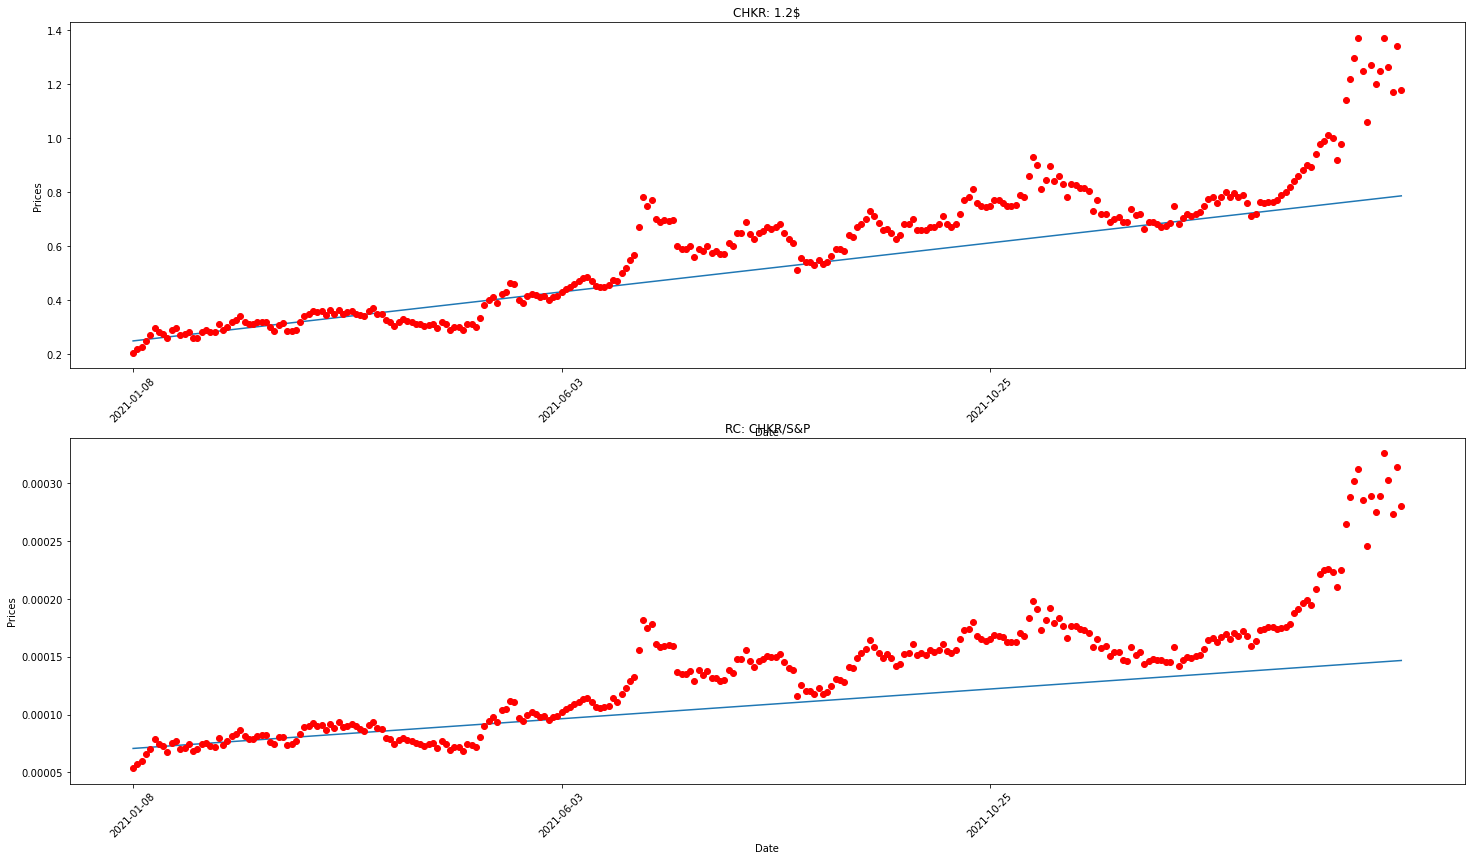

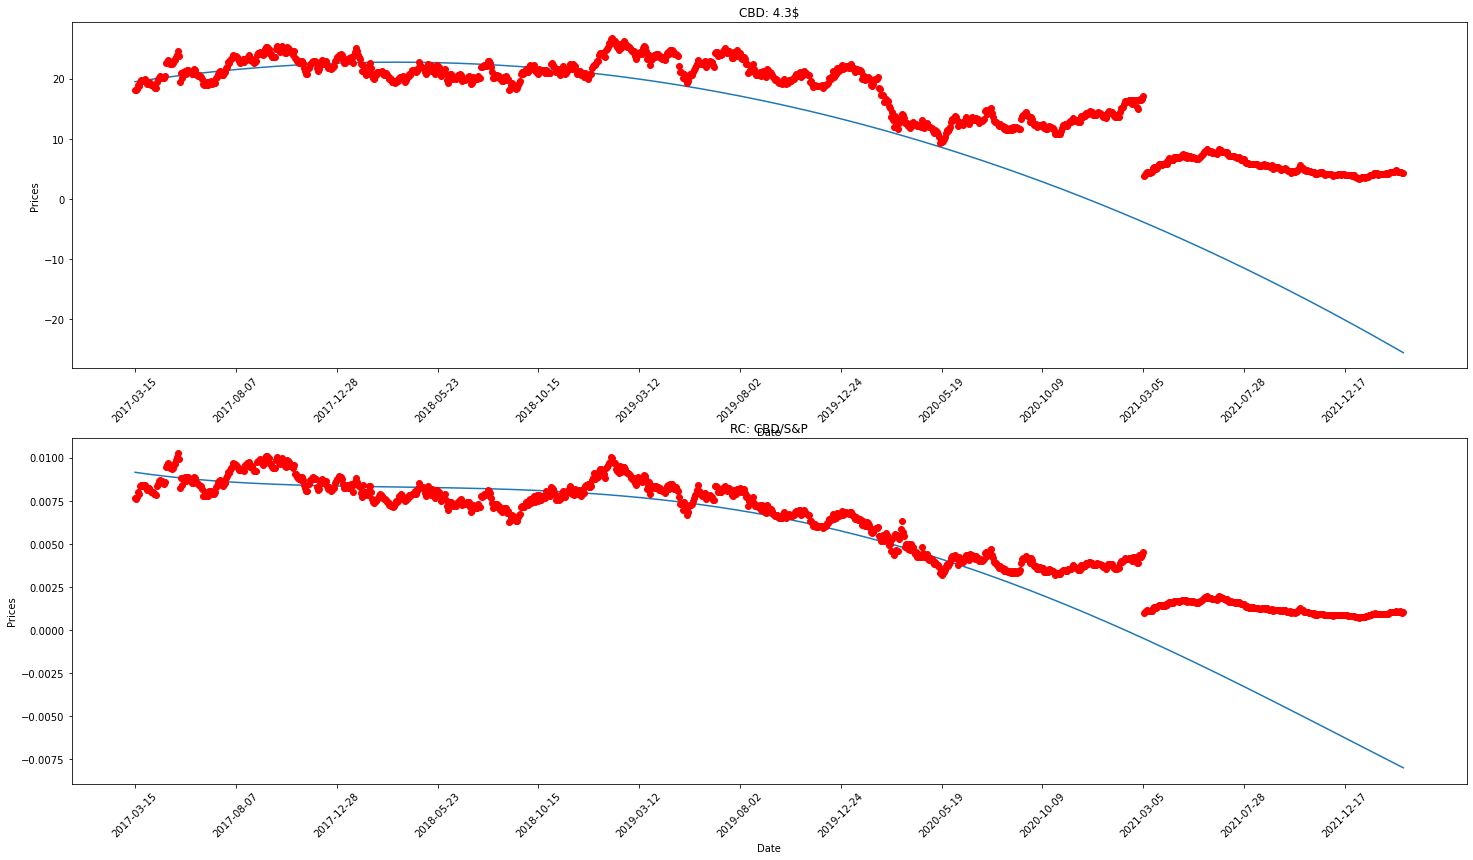

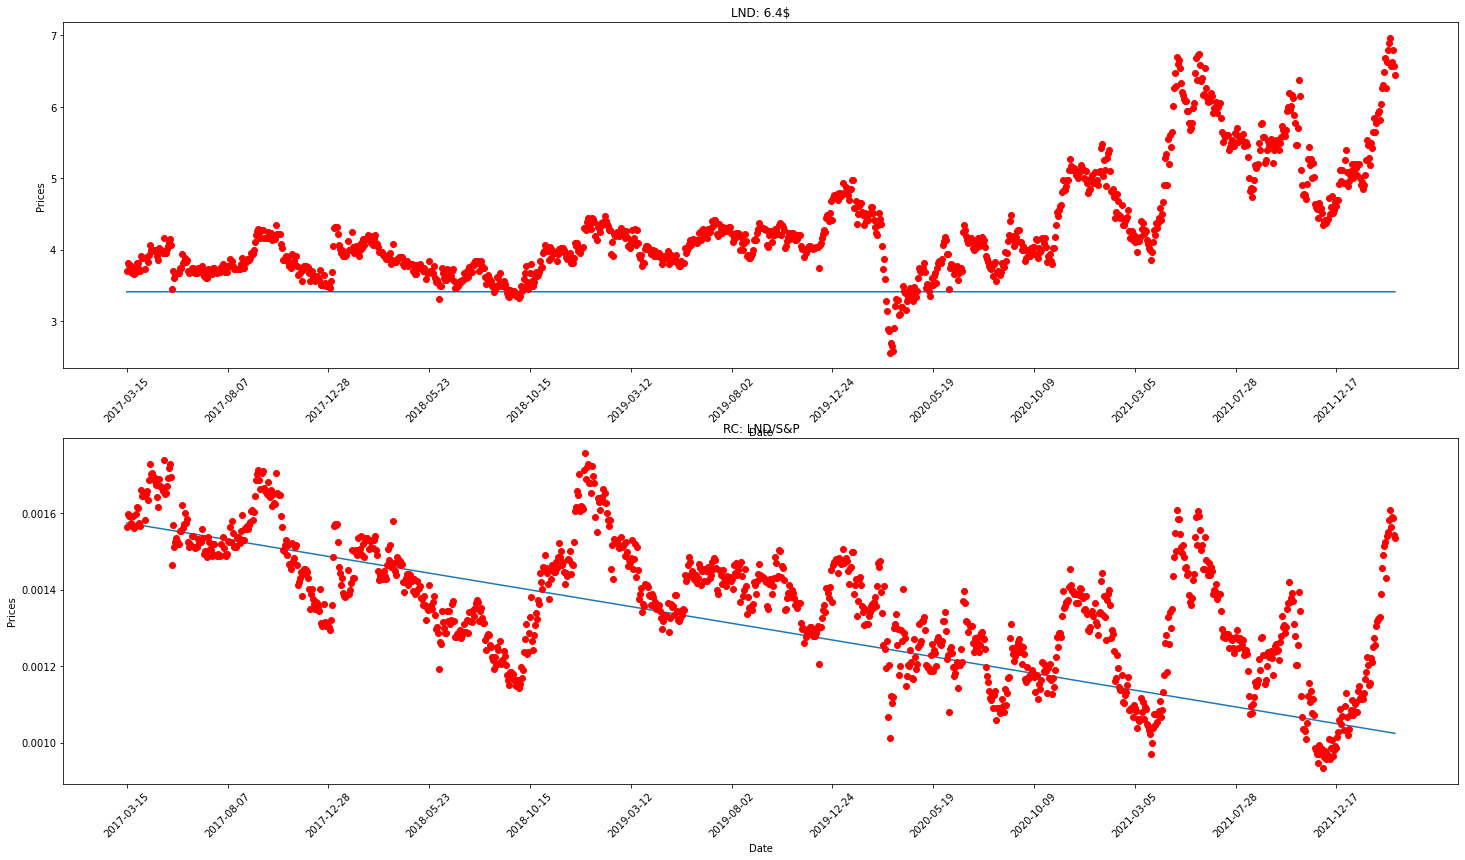

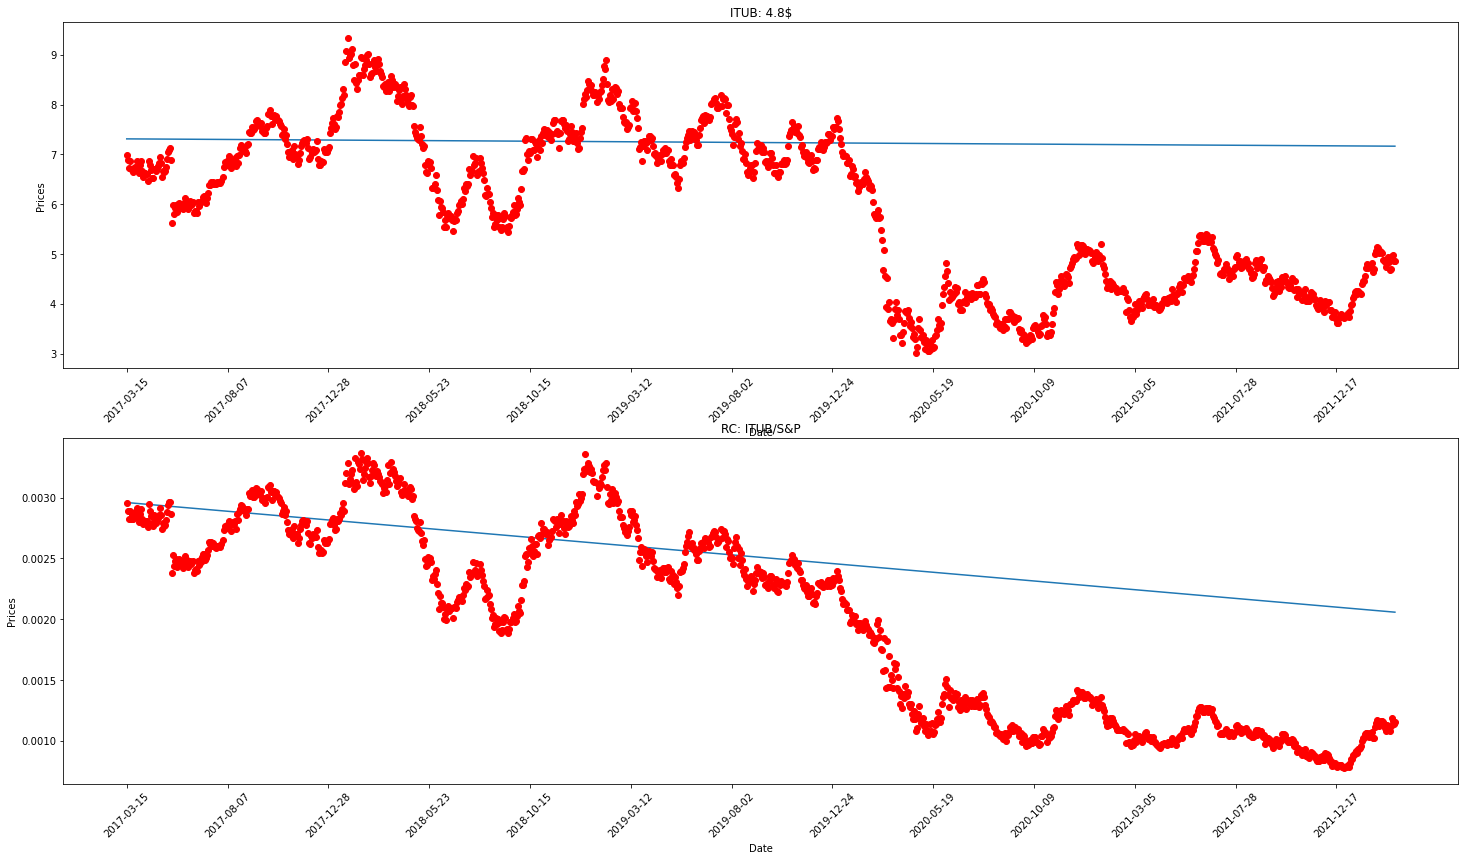

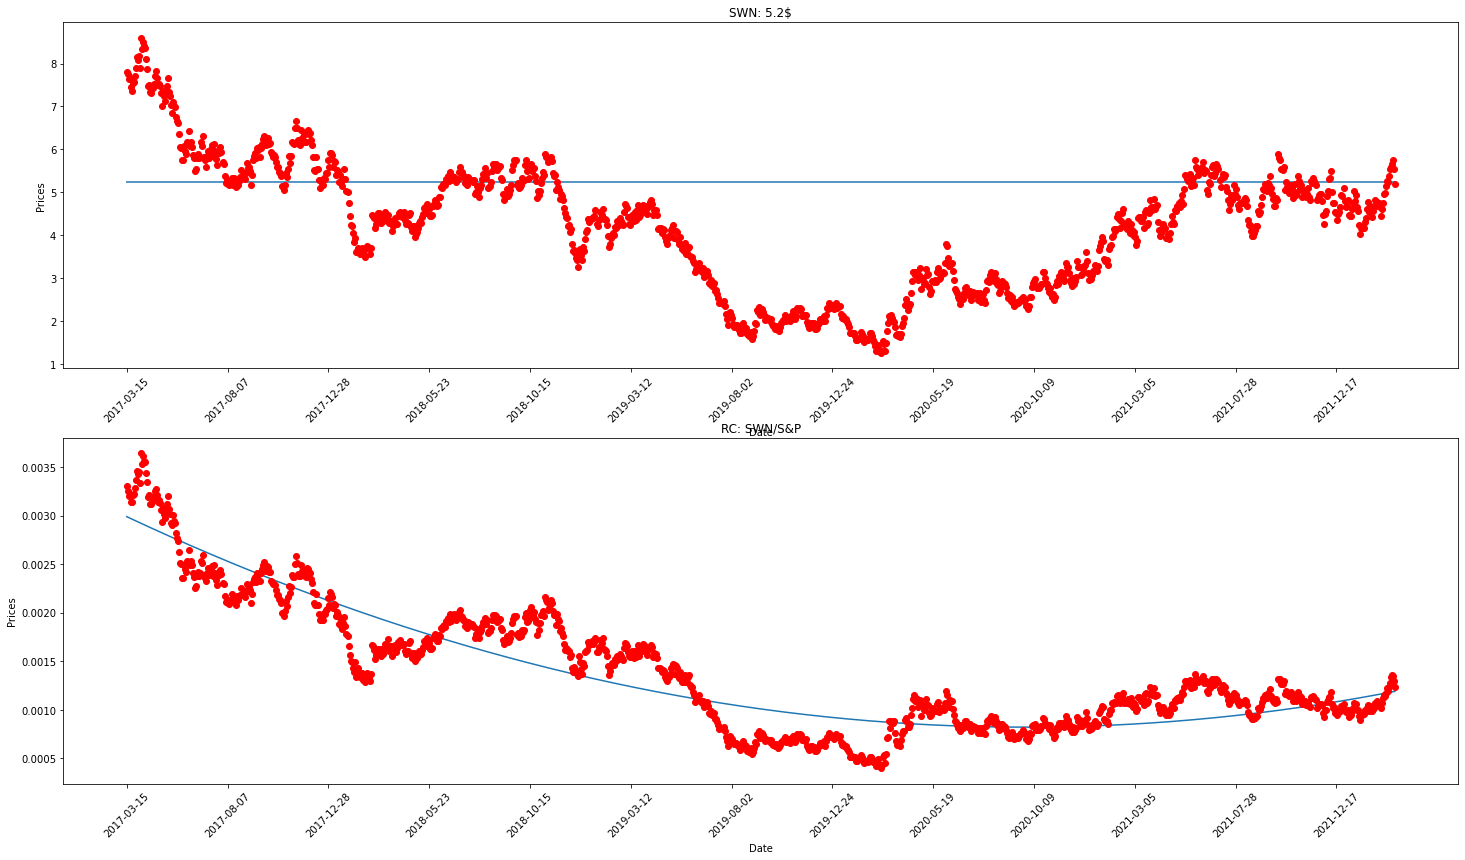

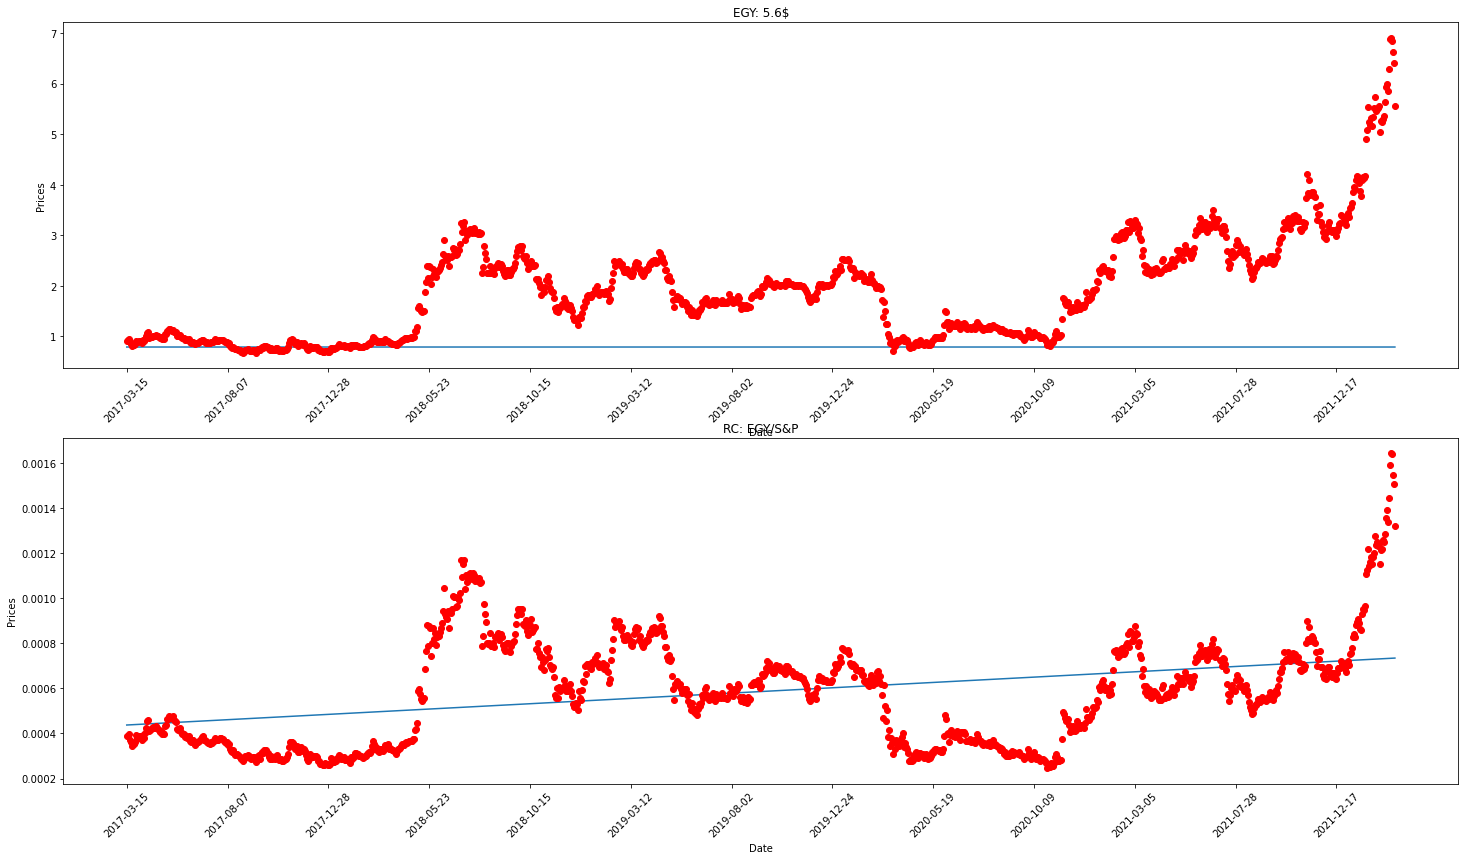

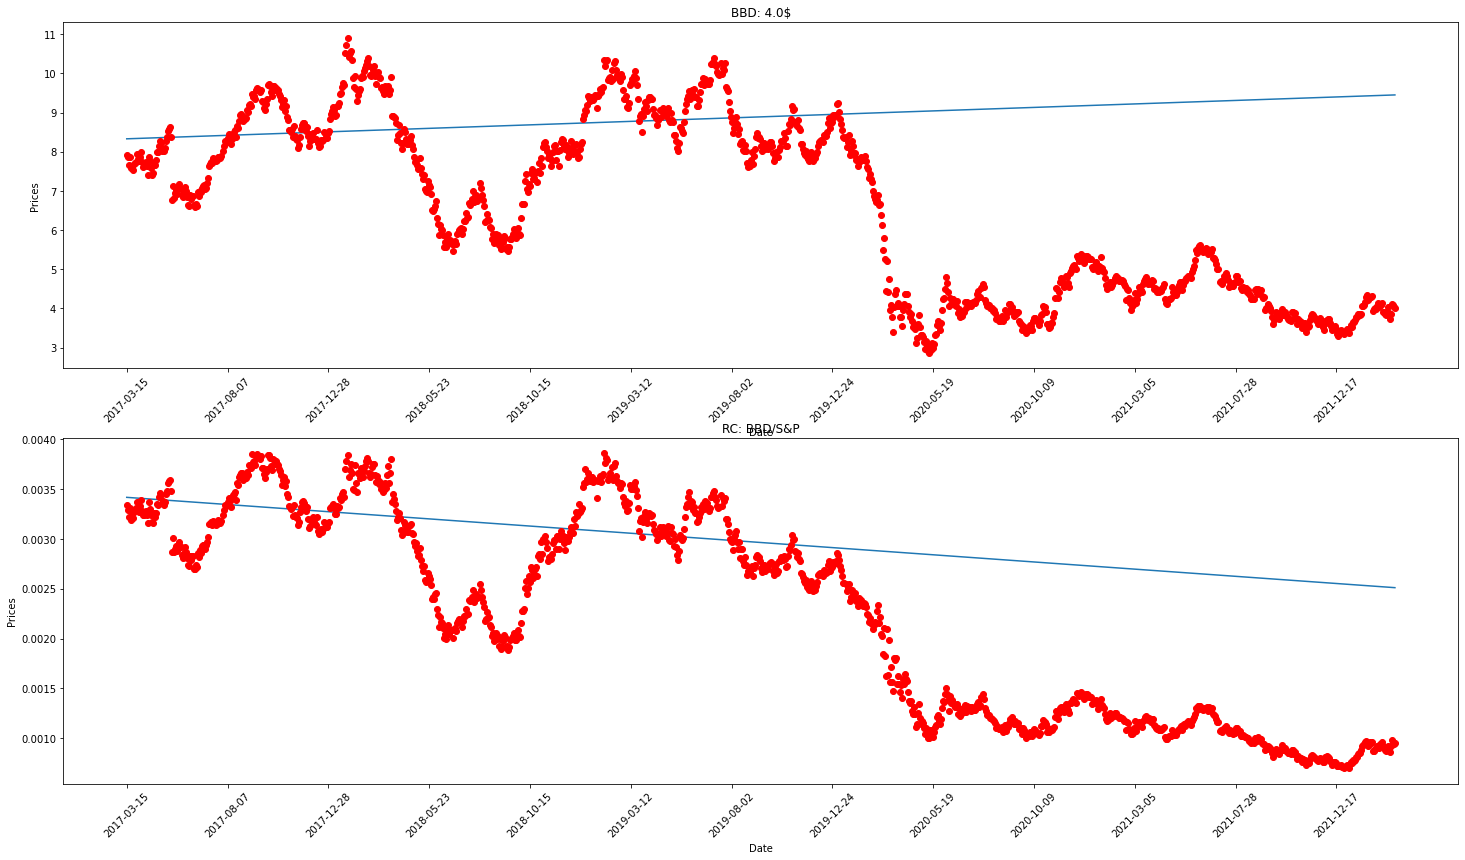

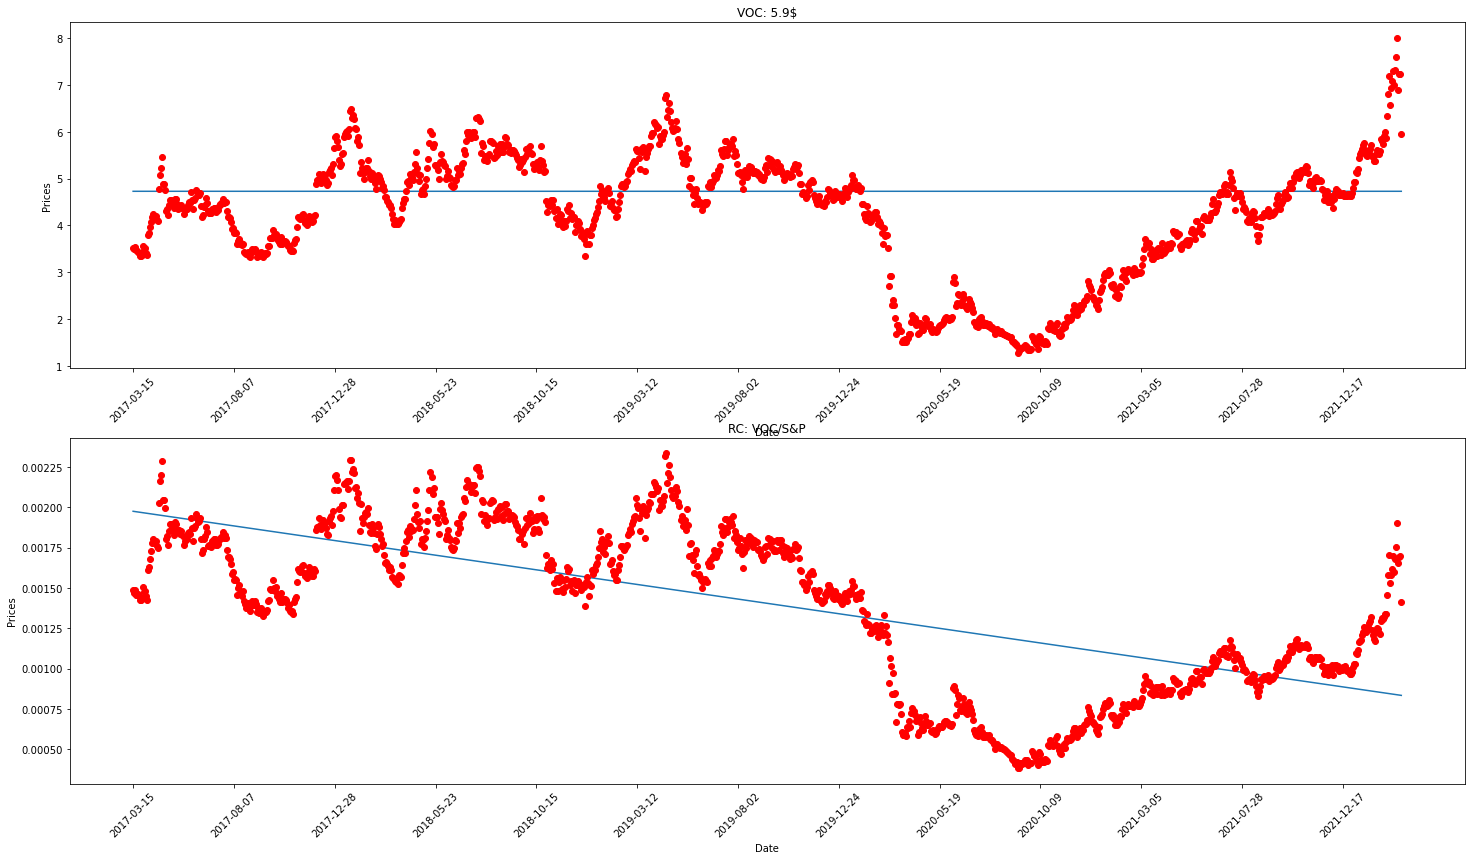

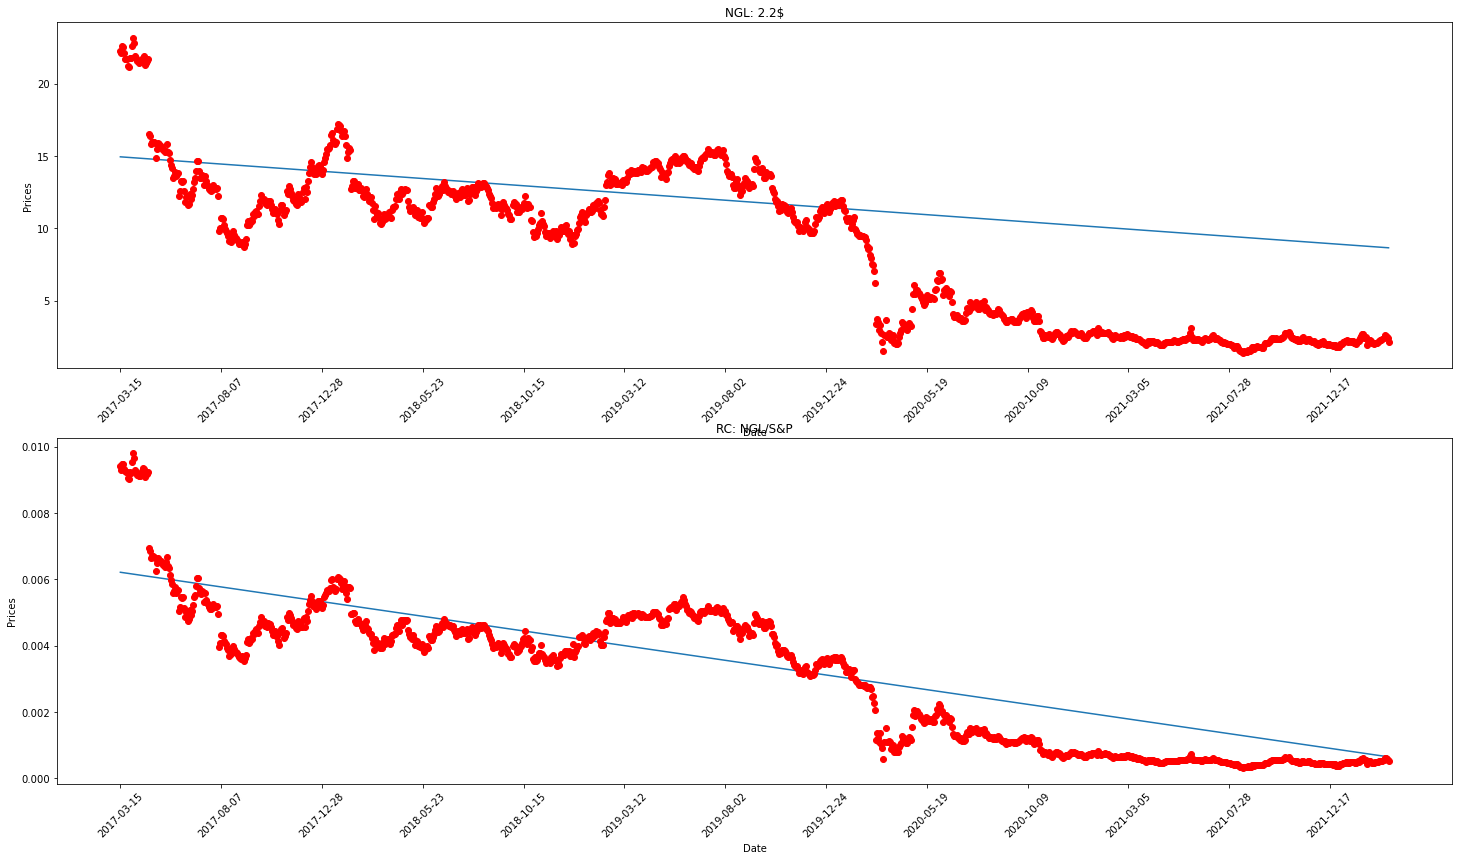

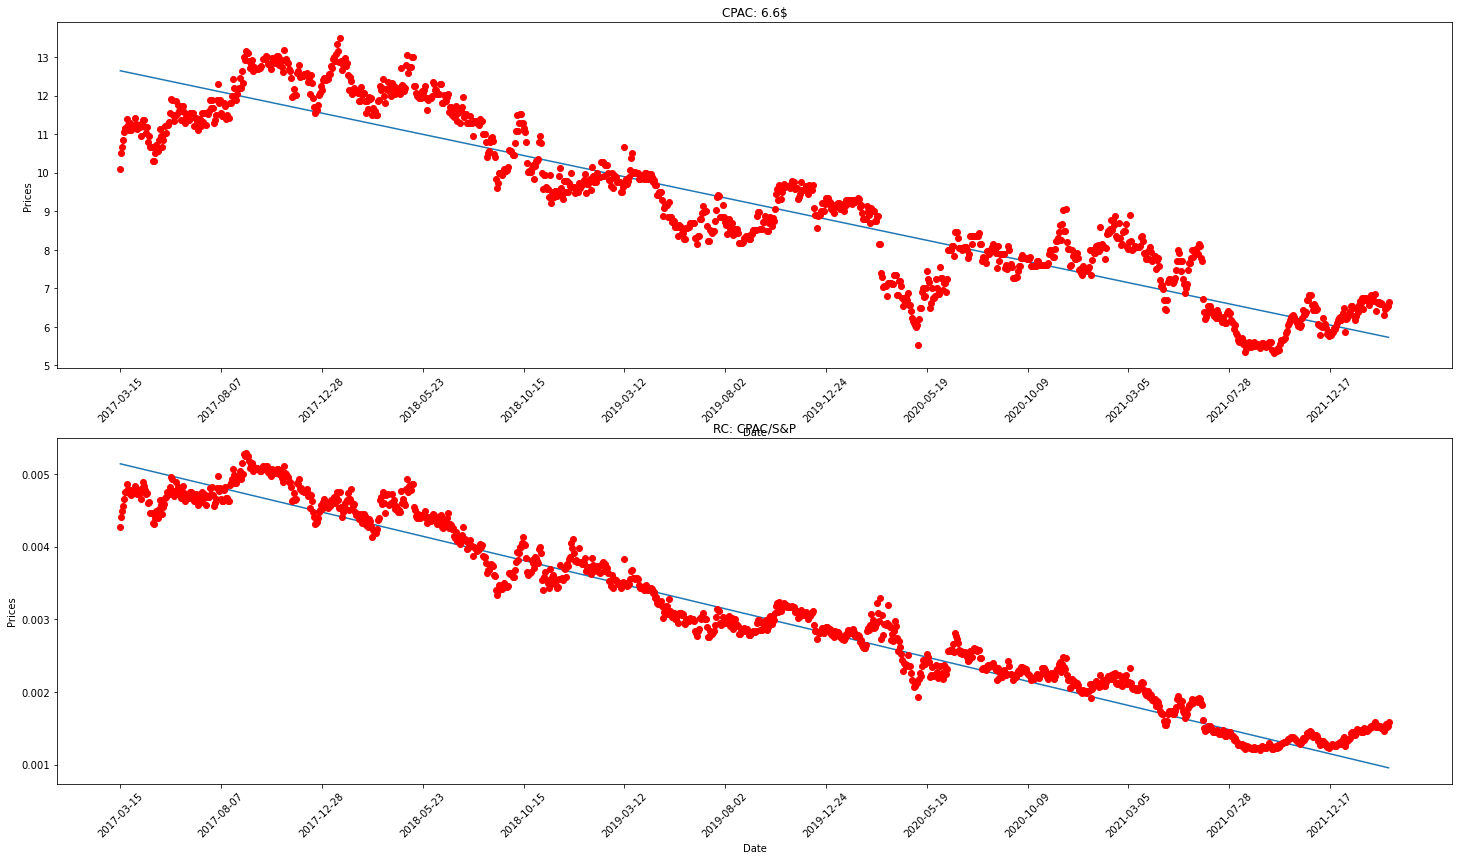

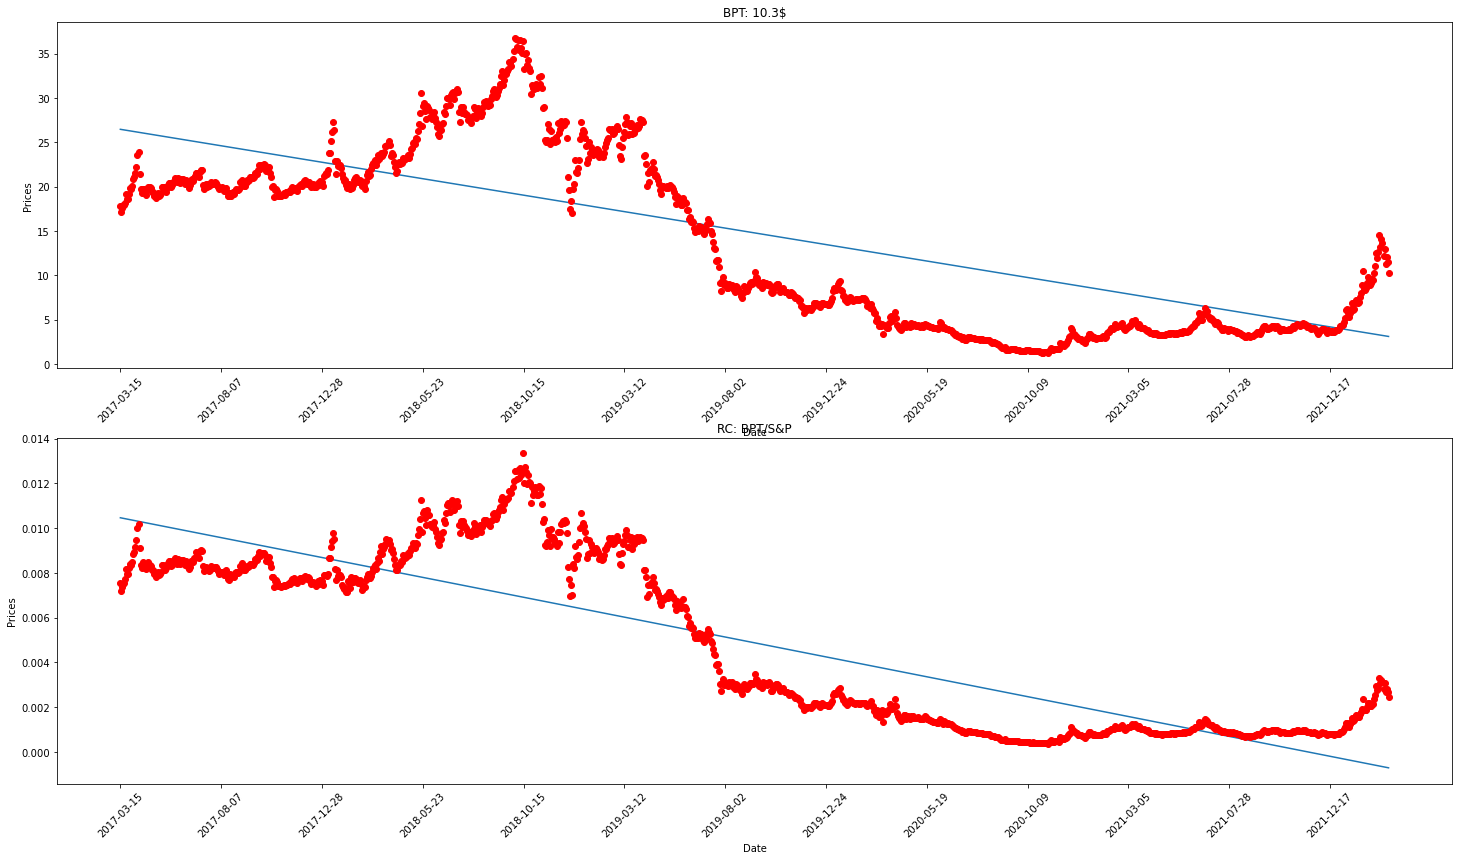

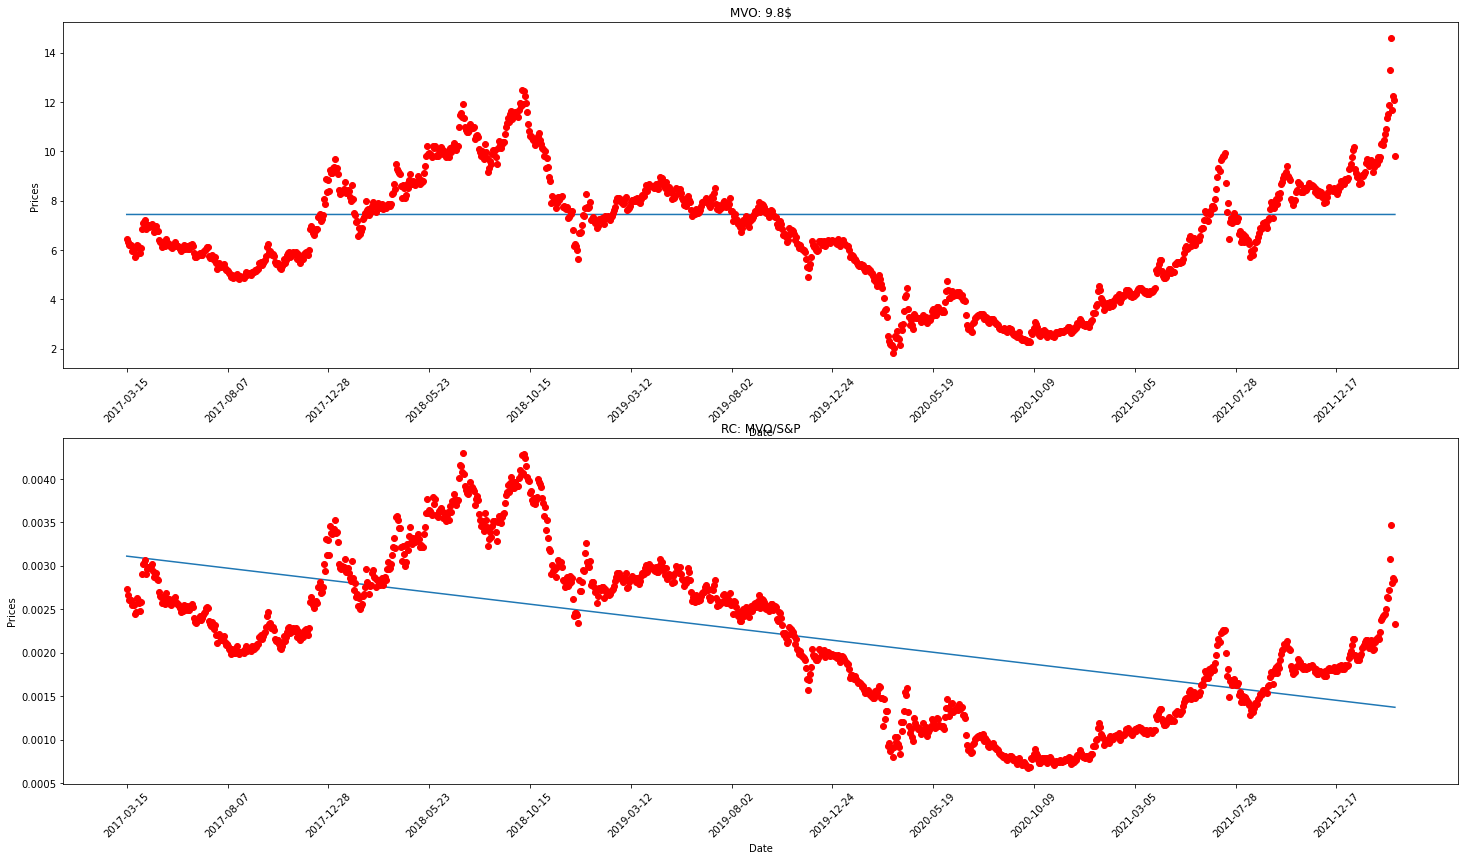

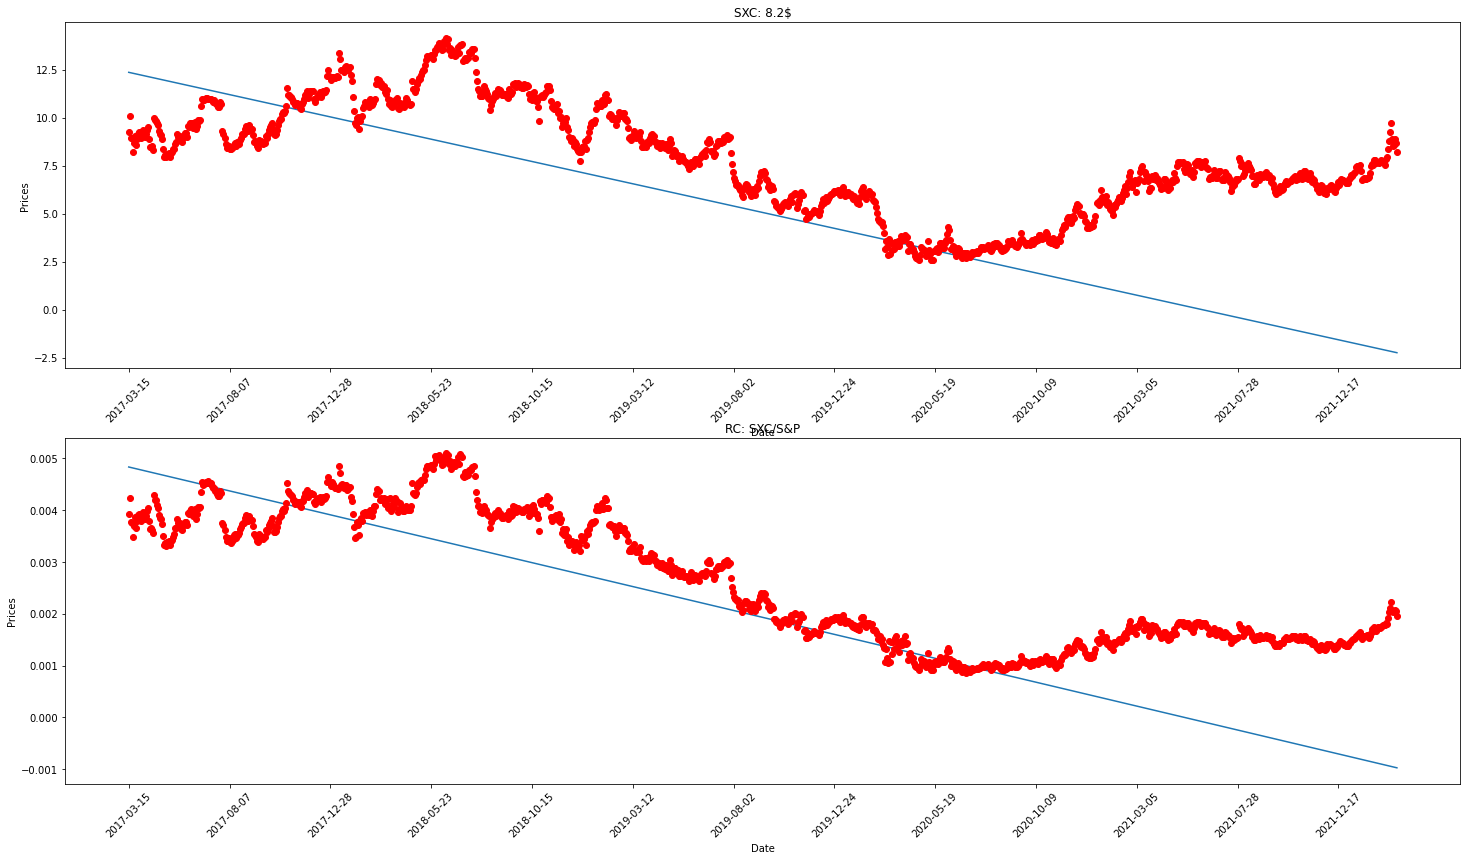

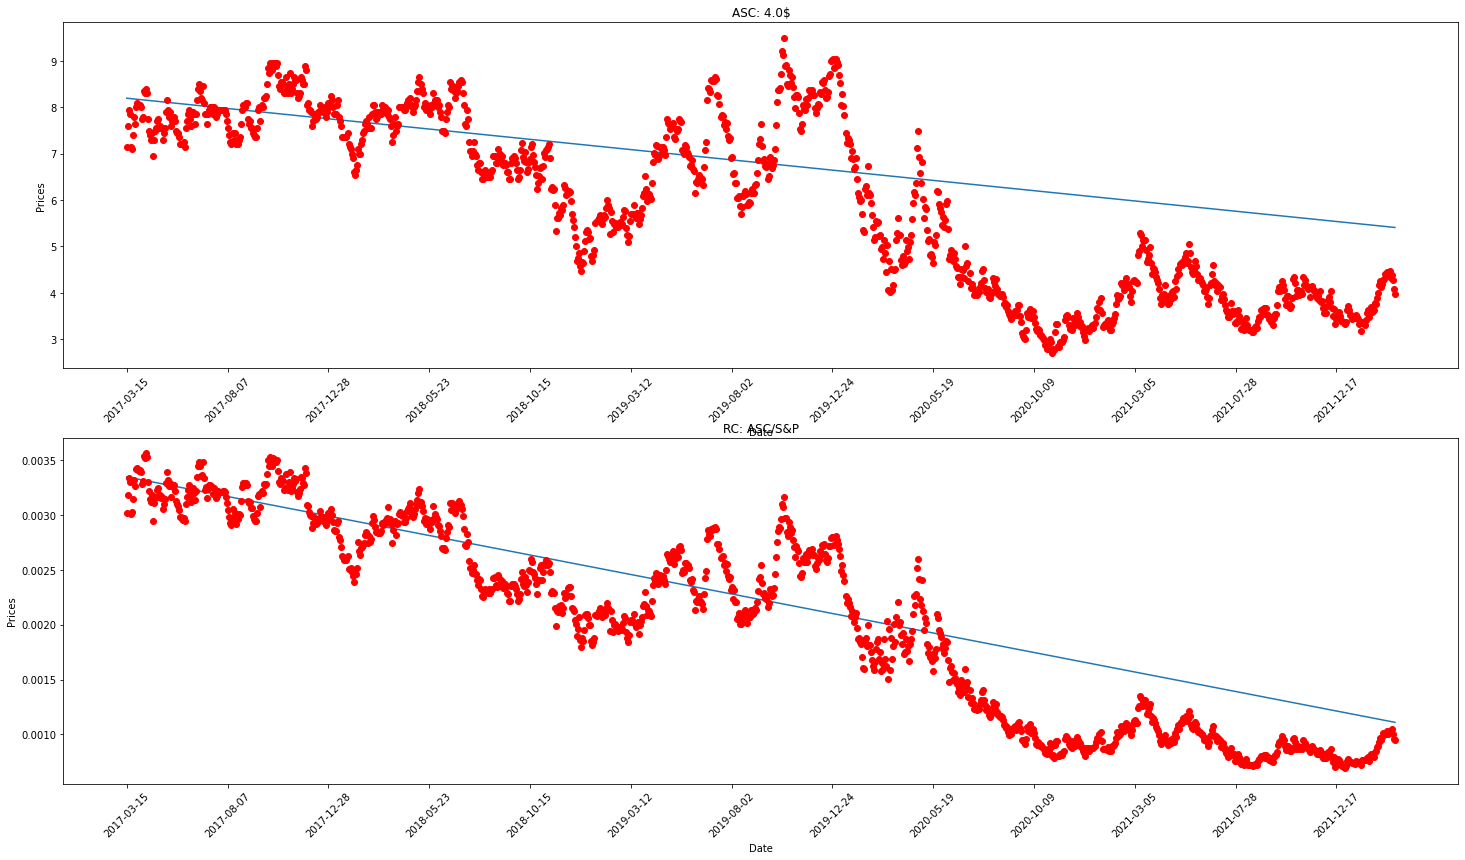

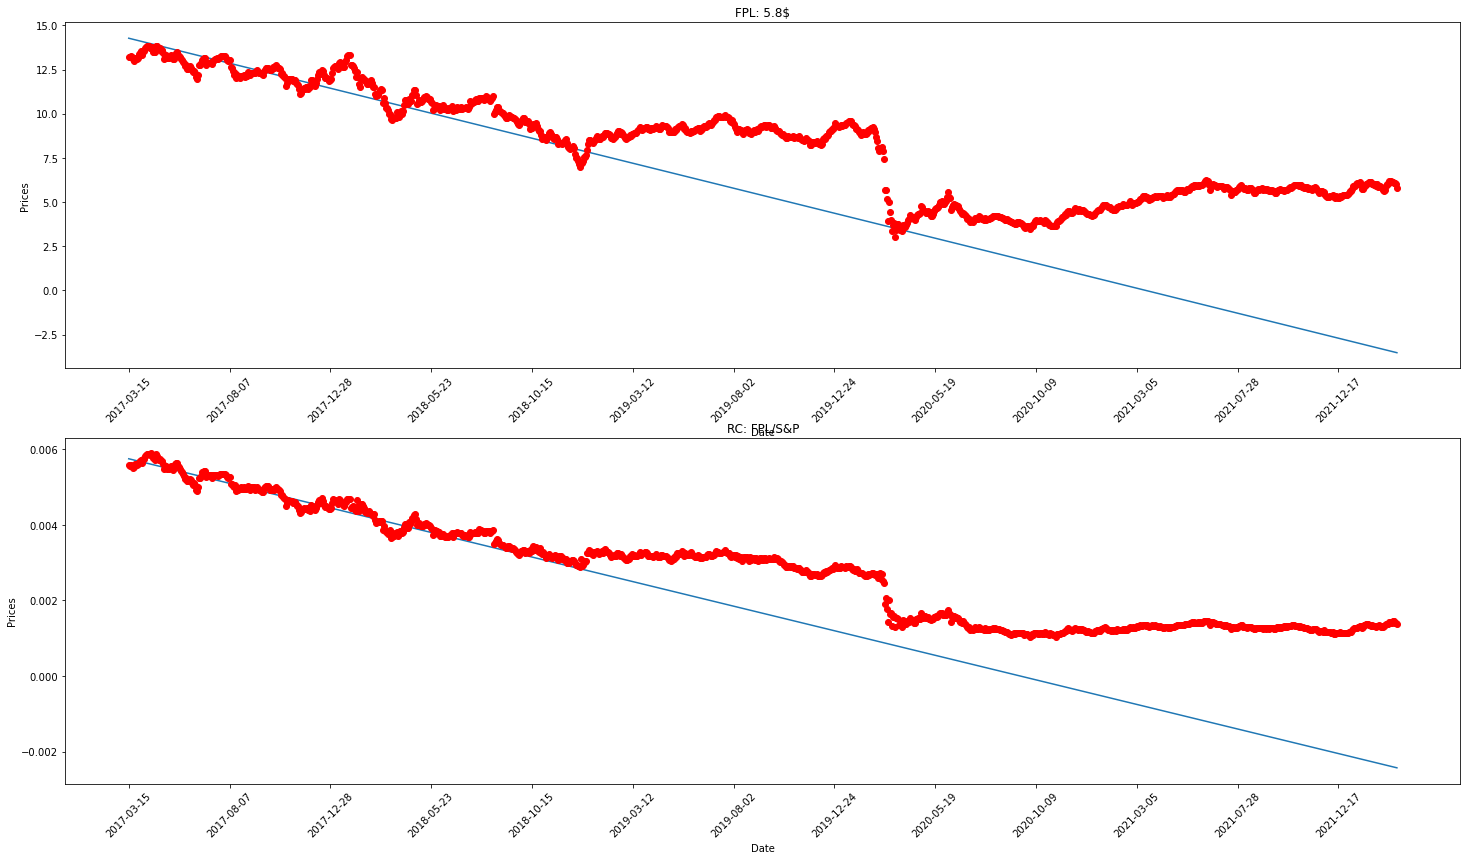

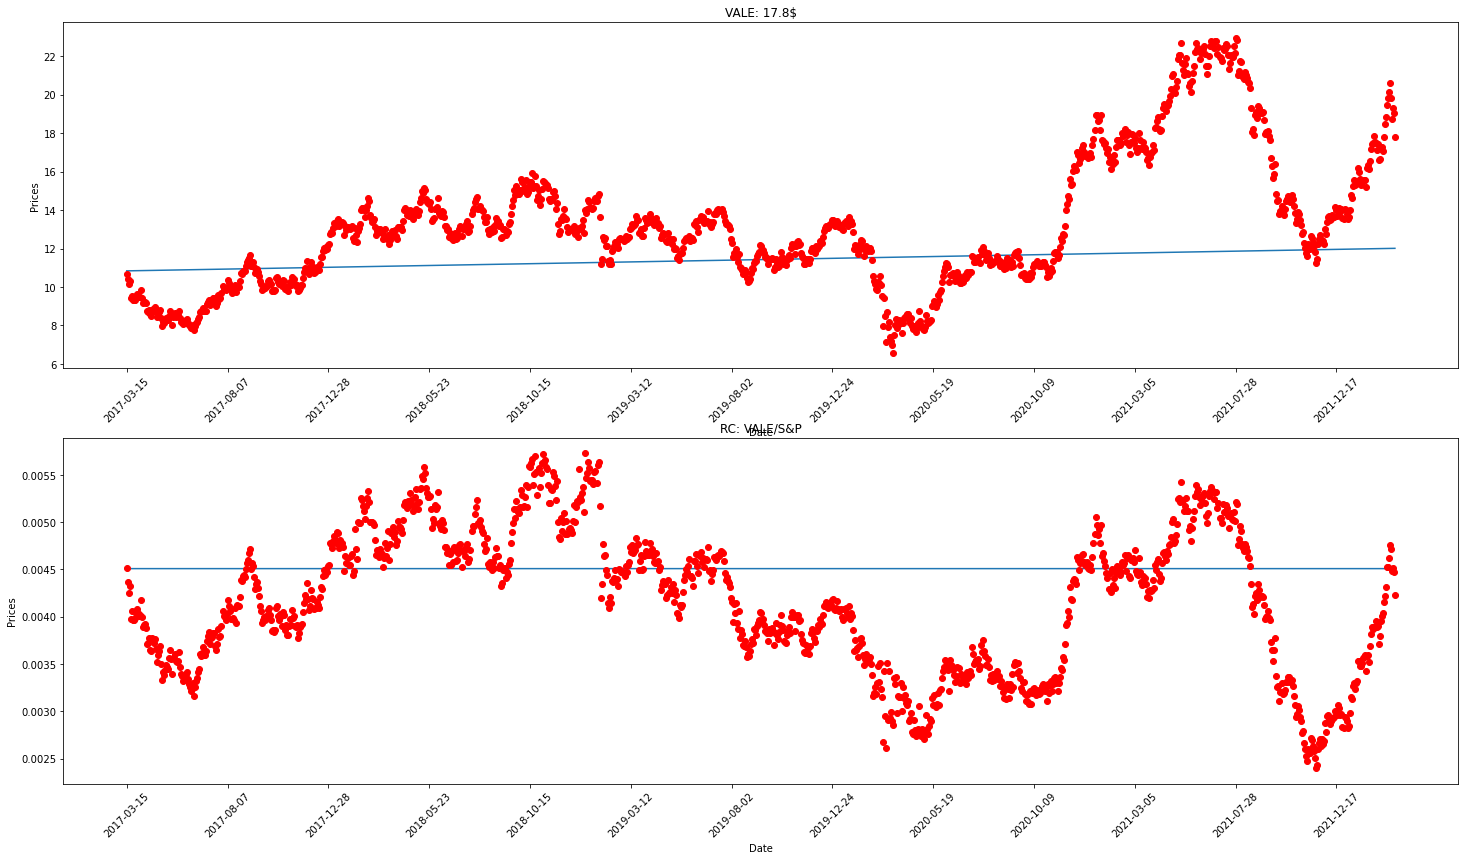

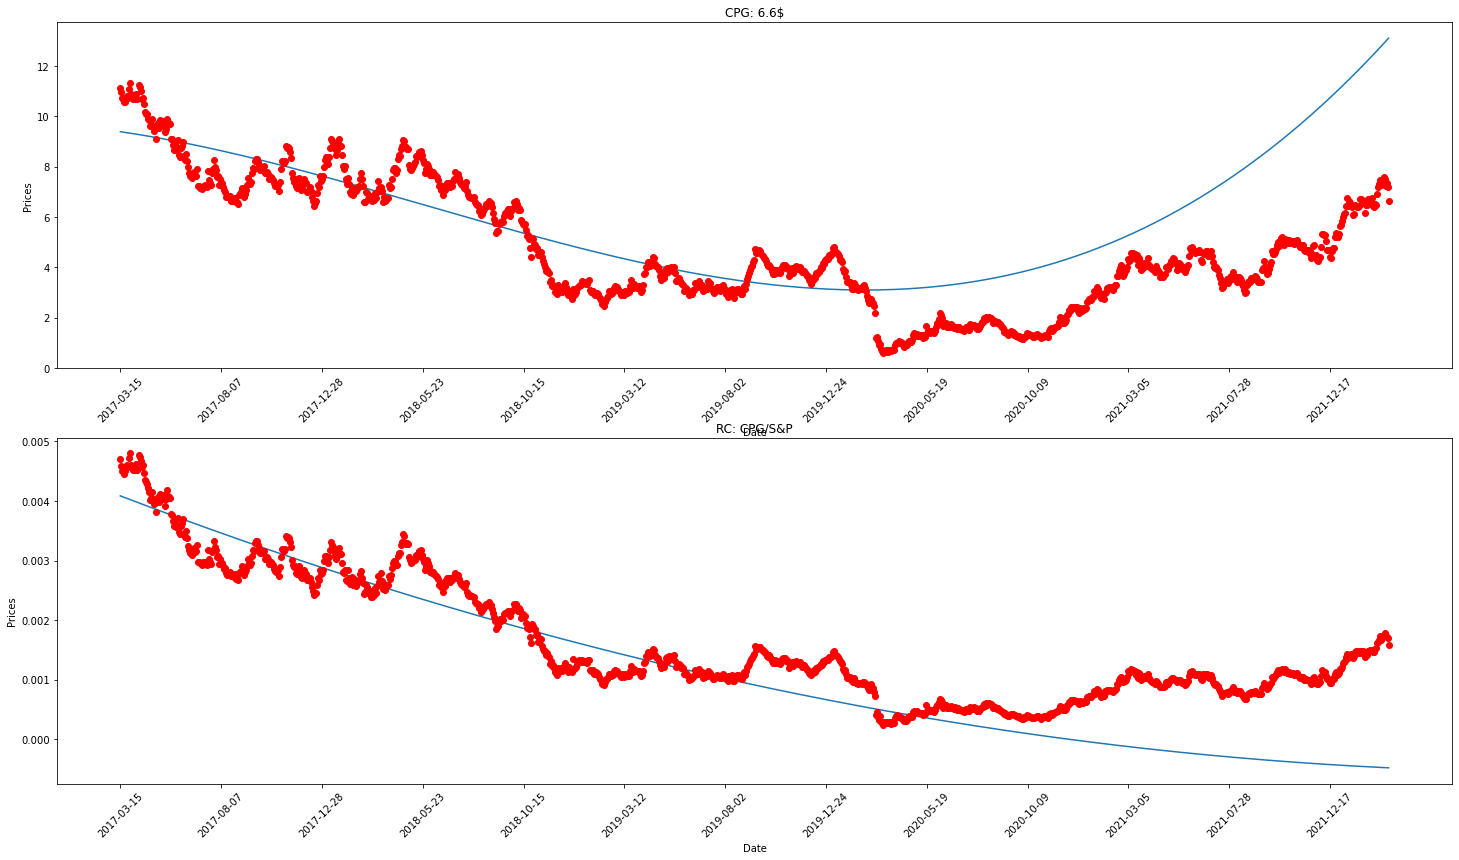

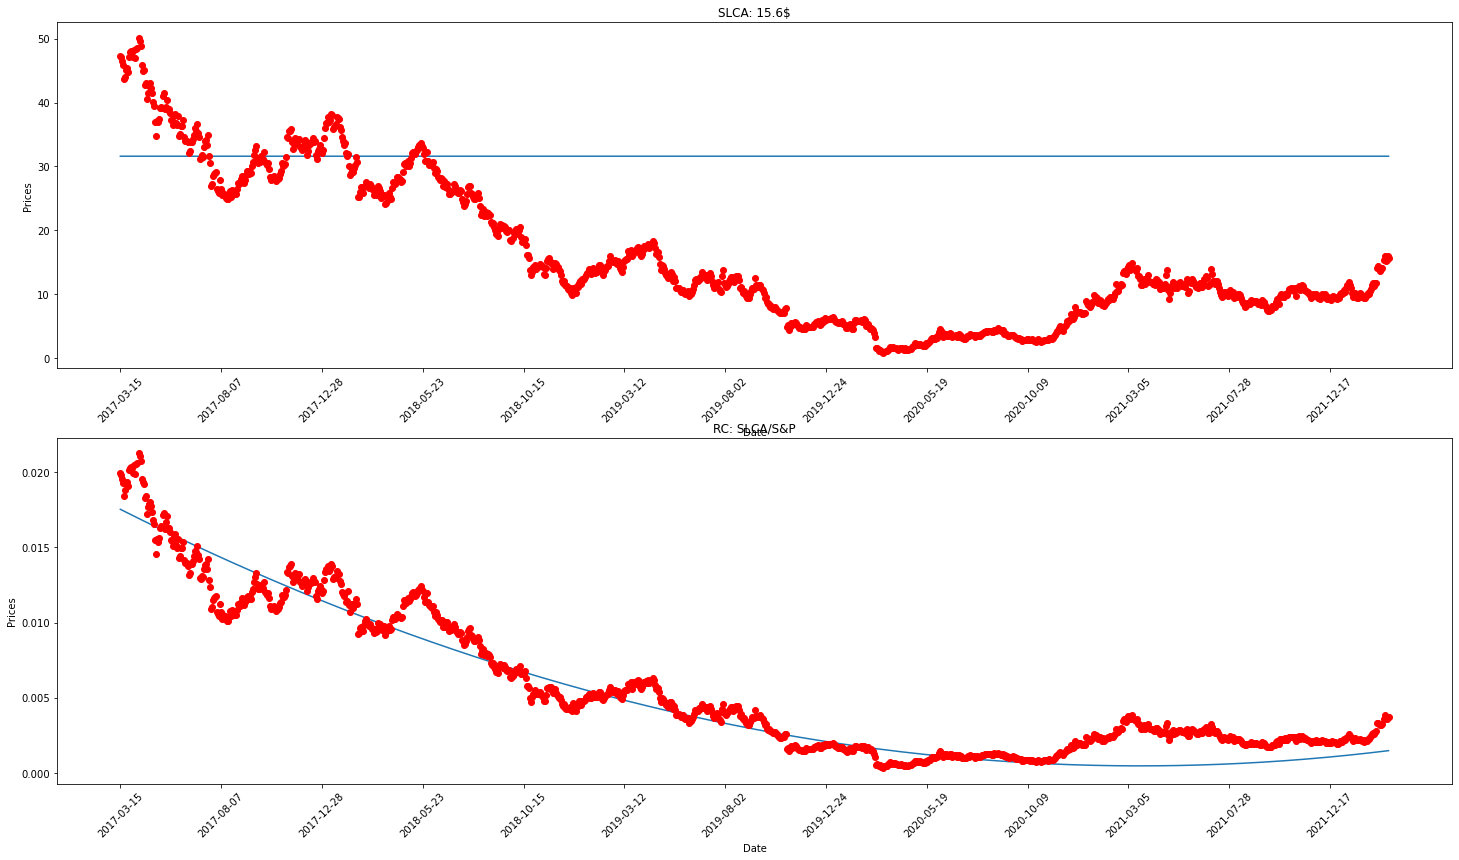

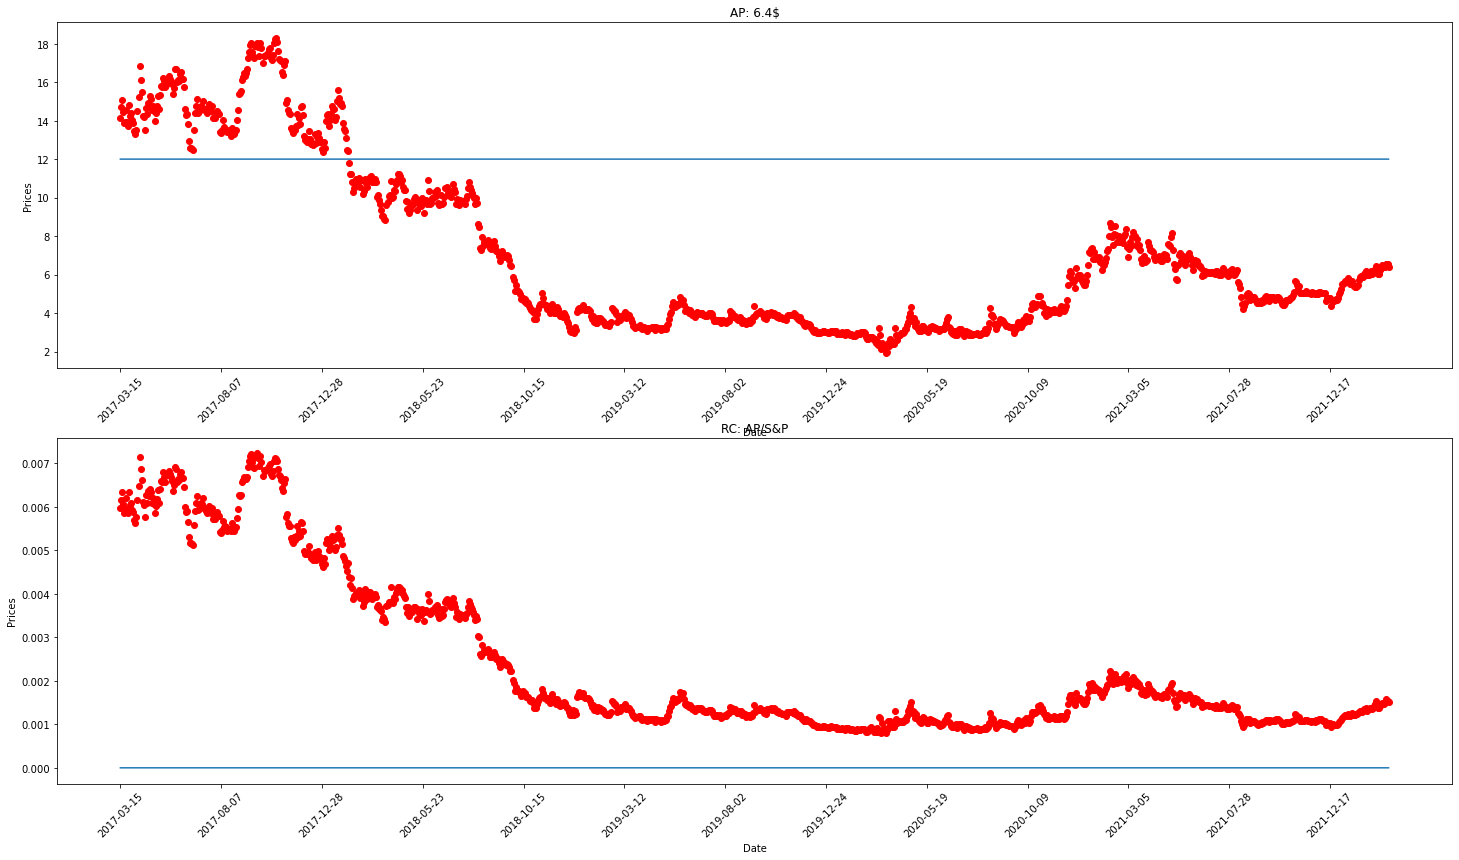

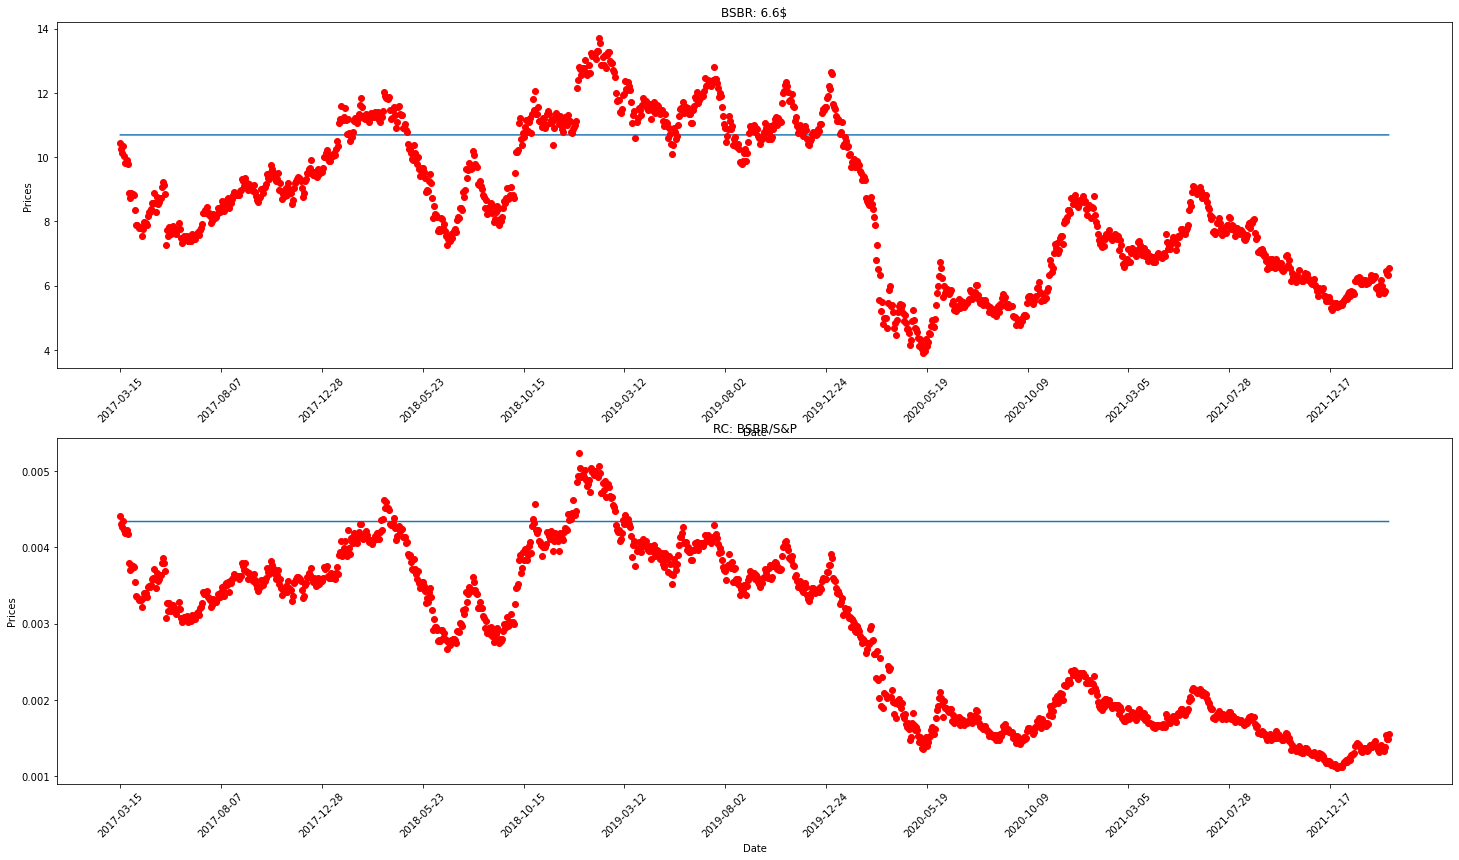

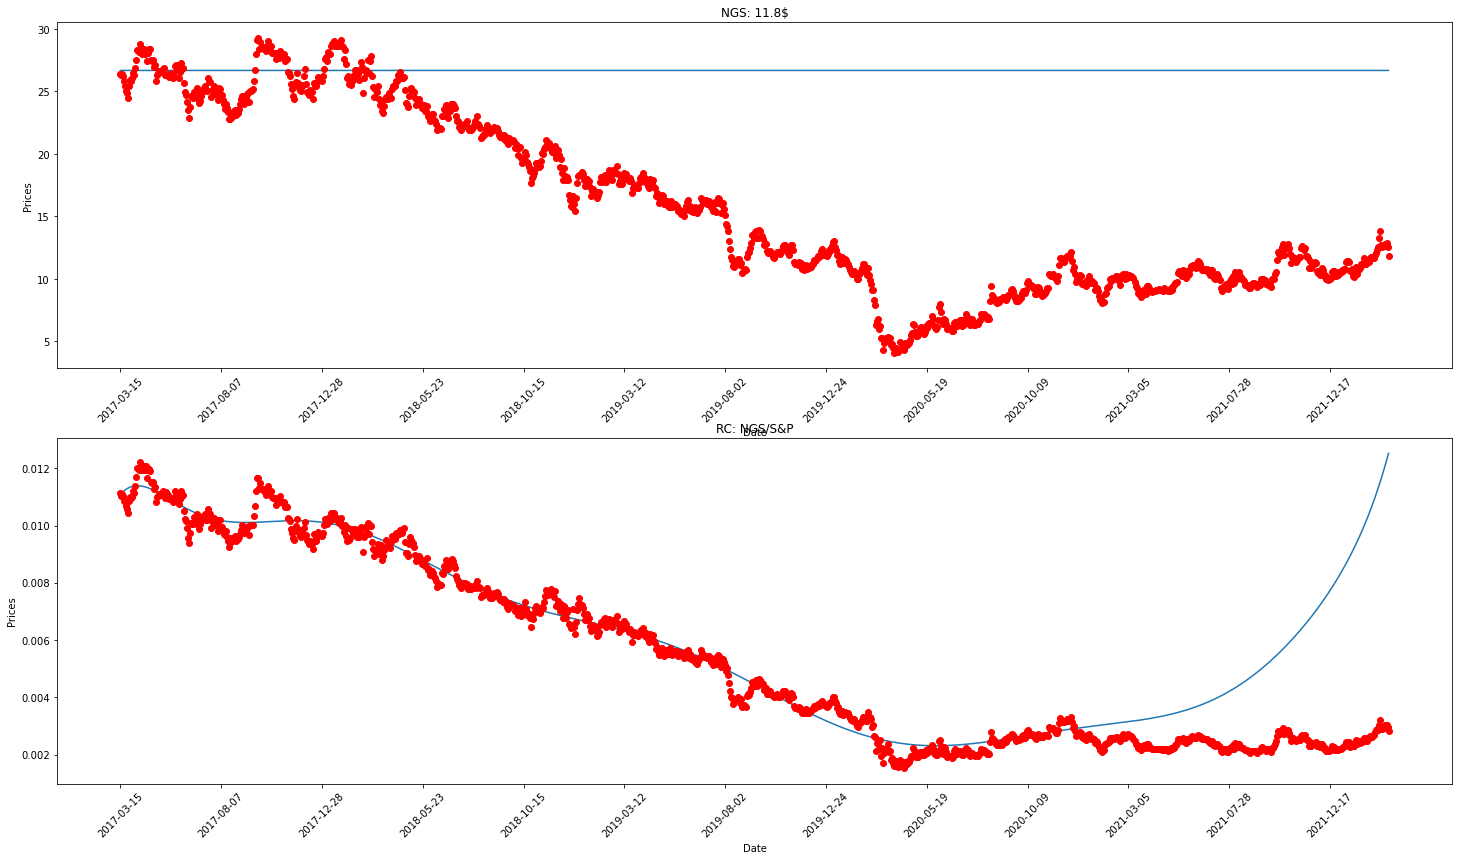

In [39]:
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
"""Plot the choosen stocks"""
yfin.pdr_override()
n = len(choosen)
df_stock = pd.DataFrame()
maximum_stock = []
maximum_RS = []
maximum_stock_x = []
maximum_RS_x = []
for i in range(n):
  #Get Stock Data and do some make them useful
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = df_stock.reset_index()
  m = len(df_stock)
  date = df_stock['Date']
  date = date.dt.strftime('%Y-%m-%d')
  date = date.to_numpy()
  date = np.reshape(date,m)
  df_SP = pdr.get_data_yahoo('^GSPC', start = date[0])
  df_SP = df_SP.reset_index()
  df_SP = df_SP[:-1]
  close_stock = df_stock['Close']
  close_SP = df_SP['Close']

  #Make RS
  close_RS = close_stock/close_SP

  #Make x data
  x_date = np.linspace(0,m,m)

  #make the pandas of the numpy
  close_stock = np.reshape(close_stock.to_numpy(),m)
  close_RS = np.reshape(close_RS.to_numpy(),m)

  #fitting
  def polynomi(x_data, p):
    import numpy as np
    n = len(x_data)
    m = len(p)
    sum_poly = []
    for i in range(n):
        poly = []
        for j in range(m):
            polynomials = p[j] * x_data[i] ** j
            poly.append(polynomials)
        sum_poly.append(np.sum(poly))
    return sum_poly
  error_stock = []
  error_RS = []
  for k in range(100):
    coef_stock = np.poly1d(np.polyfit(x_date, close_stock,k))
    coef_RS = np.poly1d(np.polyfit(x_date, close_RS,k))
    model_stock = polynomi(x_date, coef_stock)
    model_RS = polynomi(x_date, coef_RS)
    error_stock.append(mean_squared_error(close_stock, model_stock))
    error_RS.append(mean_squared_error(close_RS, model_RS))
  for j in range(len(error_stock)):
    if min(error_stock) == error_stock[j]:
      coef_stock = np.poly1d(np.polyfit(x_date, close_stock,j))
    if min(error_RS) == error_RS[j]:
      coef_RS = np.poly1d(np.polyfit(x_date, close_RS,j))

  model_stock = polynomi(x_date, coef_stock)
  model_RS = polynomi(x_date, coef_RS)

  #Get the maximum value
  # maximum_stock_x = argrelextrema(close_stock, np.greater)
  # maximum_RS_x = argrelextrema(close_RS, np.greater)
  # minimum_stock_x = argrelextrema(close_stock, np.less)
  # minimum_RS_x = argrelextrema(close_RS, np.less)
  # l = len(maximum_stock_x)
  # h = len(maximum_RS_x)
  # t = len(minimum_stock_x)
  # u = len(minimum_RS_x)
  # for j in range(l):
  #   maximum_stock = close_stock[maximum_stock_x[j]]
  # for k in range(h):
  #   maximum_RS = close_RS[maximum_RS_x[j]]
  # for q in range(t):
  #   minimum_stock = close_stock[minimum_stock_x[j]]
  # for w in range(u):
  #   minimum_RS = close_RS[minimum_RS_x[j]]
  #
  # maximum_stock_x = list(maximum_stock_x)
  # maximum_RS_x = list(maximum_RS_x)
  # minimum_stock_x = list(minimum_stock_x)
  # minimum_RS_x = list(minimum_RS_x)
  # maximum_stock_x =  maximum_stock_x[0]
  # maximum_RS_x = maximum_RS_x[0]
  # minimum_stock_x = minimum_stock_x[0]
  # minimum_RS_x = minimum_RS_x[0]

  #Plot
  plt.figure(figsize = (25,14))
  plt.subplot(2,1,1)
  #plt.plot(maximum_stock_x, maximum_stock, 'or', markersize = 3)
  plt.plot(x_date, model_stock)
  plt.plot(x_date, close_stock, 'or')
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.title(str(choosen[i]) + ': '+ str(round(close_stock[-1],1)) + '$')
  plt.xticks(x_date[::100], date[::100], rotation = 45)

  plt.subplot(2,1,2)
  #plt.plot(maximum_RS_x, maximum_RS, 'or', markersize = 3)
  plt.plot(x_date, model_RS)
  plt.plot(x_date, close_RS, 'or')
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.title('RC: '+ str(choosen[i]) + '/' + 'S&P')
  plt.xticks(x_date[::100], date[::100], rotation = 45)

In [154]:
a = [1,2,3,4]
a[-2:]

[3, 4]

In [143]:
import pandas_datareader as pdr
import yfinance as yfin
import numpy as np
yfin.pdr_override()
df_ASC = pdr.get_data_yahoo(selected_stocks[0])
df_AGRO = pdr.get_data_yahoo(selected_stocks[1])
n = df_ASC
m = df_AGRO
df_ASC_price = df_ASC['Close'].to_numpy()
df_AGRO_price = df_AGRO['Close'].to_numpy()

ASC_2 = df_ASC_price[-3] - df_ASC_price[-2]
ASC_1 = df_ASC_price[-2] - df_ASC_price[-1]
AGRO_2 = df_AGRO_price[-3] - df_AGRO_price[-2]
AGRO_1 = df_AGRO_price[-2] - df_AGRO_price[-1]
if ASC_2*ASC_1 < 0:
  print('Sell ASC')
else:
  print('Keep or buy ASC')

if AGRO_2*AGRO_1 < 0:
  print('Sell AGRO')
else:
  print('Keep or buy AGRO')


1260
Keep or buy ASC
Keep or buy AGRO


In [24]:
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
#Get the local maximums
maximum_stock = []
maximum_RS = []
maximum_stock_x = []
maximum_RS_x = []
stock = []
rs = []
n = len(choosen)
for i in range(n):
  #Get the wanted data
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = df_stock.reset_index()
  m = len(df_stock)
  date = df_stock['Date']
  date = date.dt.strftime('%Y-%m-%d')
  date = date.to_numpy()
  date = np.reshape(date,m)
  df_SP = pdr.get_data_yahoo('^GSPC', start = date[0])
  df_SP = df_SP.reset_index()
  df_SP = df_SP[:-1]
  close_stock = df_stock['Close']
  close_SP = df_SP['Close']

  #Make RS
  close_RS = close_stock/close_SP

  #make the pandas of the numpy
  close_stock = np.reshape(close_stock.to_numpy(),m)
  close_RS = np.reshape(close_RS.to_numpy(),m)

  #Get the maximum value
  maximum_stock_x = argrelextrema(close_stock, np.greater)
  maximum_RS_x = argrelextrema(close_RS, np.greater)
  l = len(maximum_stock_x)
  h = len(maximum_RS_x)
  for j in range(l):
    maximum_stock = close_stock[maximum_stock_x[j]]
    #now Progress the deviation of maximum value
  for k in range(h):
    maximum_RS = close_RS[maximum_RS_x[j]]
maximum_stock

array([12.25      , 12.09000015, 11.77000046, 11.56999969, 11.69999981,
       11.64999962, 11.22999954, 11.40999985, 11.55000019, 11.61999989,
       11.10999966, 11.39000034, 11.10000038, 10.56999969, 10.32999992,
       10.39999962, 10.31000042, 10.02999973, 10.        , 10.10000038,
       10.06999969,  9.68000031,  9.97999954, 10.59000015, 10.44999981,
       10.17000008, 10.34000015, 10.06000042, 10.21000004, 10.05000019,
       10.17000008, 10.17000008, 11.02000046, 10.93999958, 10.68000031,
       10.75      , 10.32999992,  9.72999954,  9.34000015,  9.06999969,
        9.82999992,  9.85000038, 10.22000027, 10.22000027, 10.27999973,
       10.32999992, 10.38000011, 10.56000042, 10.31999969, 10.11999989,
        9.81999969, 10.18000031, 10.22999954,  9.89000034,  9.56999969,
        9.40999985,  9.28999996,  9.06999969,  8.98999977,  8.92000008,
        8.35000038,  7.92999983,  7.71999979,  8.09000015,  8.02000046,
        7.84000015,  7.84000015,  7.63000011,  8.27999973,  8.18

In [25]:
# We have maximum_rs and maximum_rs_x and stock as well.
maximum_stock_x = list(maximum_stock_x)
maximum_RS_x = list(maximum_RS_x)
maximum_stock_x =  maximum_stock_x[0]
maximum_RS_x = maximum_RS_x[0]
print(len(maximum_stock), len(maximum_RS_x))

289 333


In [26]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [32]:
len(maximum_stock)
import polynomi
polynomi??

In [44]:
from sklearn.metrics import mean_squared_error
def polynomi(x_data, p):
    import numpy as np
    n = len(x_data)
    m = len(p)
    sum_poly = []
    for i in range(n):
        poly = []
        for j in range(m):
            polynomials = p[j] * x_data[i] ** j
            poly.append(polynomials)
        sum_poly.append(np.sum(poly))
    return sum_poly

In [56]:
print(len(maximum_stock_x),len(maximum_stock))

289 289


In [88]:
n = 3
for i in range(5):
  if n == 3:
    print(i)
    break

0


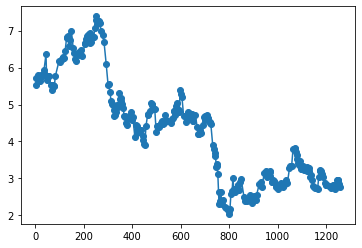

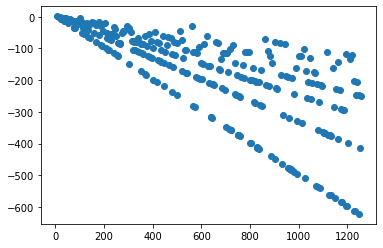

In [54]:
import matplotlib.pyplot as plt
n = len(maximum_RS_x)
m = len(maximum_stock_x)
plt.plot(maximum_stock_x,maximum_stock, '-o')
plt.show()
dev_stock = []
dev_RS = []
for i in range(m):
  try:
    dev_stock.append((maximum_stock[i+1] - maximum_stock_x[i])/(maximum_stock_x[i+1] - maximum_stock_x[i]))
  except IndexError:
    break
for j in range(n):
  try:
    dev_RS.append((maximum_RS[j+1] - maximum_RS[j])/(maximum_RS_x[j+1] - maximum_RS_x[j]))
  except IndexError:
    break
plt.plot(maximum_stock_x[1:],dev_stock, 'o')

In [32]:
%whos

Variable                        Type         Data/Info
------------------------------------------------------
DataFrame                       type         <class 'pandas.core.frame.DataFrame'>
MultiIndex                      type         <class 'pandas.core.indexes.multi.MultiIndex'>
Probability                     float        0.5681818181818182
Stock                           type         <class '__main__.Stock'>
argrelextrema                   function     <function argrelextrema at 0x0000013D78E97F78>
buildMenu                       function     <function buildMenu at 0x0000013D73A85708>
choosen                         list         n=4
close                           list         n=4
close_RS                        ndarray      1261: 1261 elems, type `float64`, 10088 bytes
close_SP                        Series       0       2373.469971\n1   <...>gth: 1260, dtype: float64
close_stock                     ndarray      1261: 1261 elems, type `float64`, 10088 bytes
date                

In [2]:
import yfinance

In [3]:
choosen

NameError: name 'choosen' is not defined

In [144]:
%pwd

'C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly'

In [145]:
cd ..

C:\Users\UOS\PycharmProjects\pythonProject\JupyterNote


In [146]:
cd ..

C:\Users\UOS\PycharmProjects\pythonProject


In [147]:
cd MayFly_Finance/Project_vol1

C:\Users\UOS\PycharmProjects\pythonProject\MayFly_Finance\Project_vol1


In [149]:
%run ASCandAGRO.py

Keep or buy ASC
Keep or buy AGRO


In [ ]:
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()
#import all stocks name
df = pd.read_csv('https://pkgstore.datahub.io/core/nyse-other-listings/nyse-listed_csv/data/3c88fab8ec158c3cd55145243fe5fcdf/nyse-listed_csv.csv')
df = df['ACT Symbol']
m = len(df)
#Save Close and name of equity that satisfies the condition
close = []
stock = []

for j in range(m):
  start_date = '2022-01-01'
  df_Stock = pdr.get_data_yahoo(df[j], start = start_date)
  price = df_Stock['Close']
  n = len(price)
  price = price.to_numpy()
  price = np.reshape(price,n)
  price_limit = 100 #dollars
  stock.append(df[j])
  for j in range(n):
    if price[-1] < price_limit:
      close.append([price[j]])




df_PotenStock = pd.DataFrame({'Stock': stock, 'Close': close, 'Value': prob})
file_name = input("Decide your csv file name ")
df_PotenStock.to_csv(file_name)

In [1]:
print('hi')

hi


In [8]:
import yfinance as yfin
import pandas_datareader as pdr
yfin.pdr_override()
df_SP = pdr.get_data_yahoo('^GSPC')
df_SP.to_csv('C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly','df_SP')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly'

In [6]:
%pwd

'C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly'

In [7]:
df_SP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-15,2390.010010,2368.939941,2370.340088,2385.260010,3906840000,2385.260010
2017-03-16,2388.100098,2377.179932,2387.709961,2381.379883,3365660000,2381.379883
2017-03-17,2385.709961,2377.639893,2383.709961,2378.250000,5178040000,2378.250000
2017-03-20,2379.550049,2369.659912,2378.239990,2373.469971,3054930000,2373.469971
2017-03-21,2381.929932,2341.899902,2379.320068,2344.020020,4265590000,2344.020020
...,...,...,...,...,...,...
2022-03-09,4299.399902,4223.100098,4223.100098,4277.879883,4220180000,4277.879883
2022-03-10,4268.279785,4209.799805,4252.549805,4259.520020,4008690000,4259.520020
2022-03-11,4291.009766,4200.490234,4279.500000,4204.310059,3877430000,4204.310059


In [12]:
taken = ['CPAC', 'SXC', 'ASC', 'BSBR']
import numpy as np
for i in taken:
  df_stock = pdr.get_data_yahoo(i)
  df_close = df_stock['Close']
  close = np.reshape(df_close.to_numpy(),len(df_close))
  t_2 = close[-3] - close[-2]
  t_1 = close[-2] - close[-1]
  if t_2*t_1 < 0:
    print('Sell 2 or 3 stocks')
  else:
    print('Buy or Keep')

Buy or Keep
Buy or Keep
Buy or Keep
Buy or Keep


In [29]:
print(r"\\")

\\


In [36]:
#test: f string

f'{"hi":<10}'
f'{"hi":^10}'
f'{"hi":!^10}'

'!!!!hi!!!!'

In [37]:
print(f'{"hi":!^10}')

!!!!hi!!!!


In [40]:
y = 3.1415923684
f'{y:0.4f}'

'3.1416'

In [41]:
int('3.15')

ValueError: invalid literal for int() with base 10: '3.15'

In [57]:
%pdb

Automatic pdb calling has been turned OFF


In [52]:
question = ['이름', '전공', '취미']
answer = []
for i in range(len(question)):
  ask = input("이름, 전공, 취미를 입력하세요. ")
  answer.append(ask)
print(f'{answer[0]} 학생은 {answer[1]}이/가 전공이며 {answer[2]}이/가 취미입니다')

 학생은 이/가 전공이며 이/가 취미입니다


In [82]:
import datetime
now = datetime.datetime.now()
now = now.strftime('%Y-%m-%d-%a-%H-%M-%S')
now = now.split('-')
print(f'오늘 날짜는 {now[0]}년 {now[1]}월 {now[2]}일 {now[3]}, 현재 시각은 {now[4]}시 {now[5]}분 {now[6]}초')

오늘 날짜는 2022년 03월 16일 Wed, 현재 시각은 11시 47분 06초


'2022-03-16-11-45-52'

In [84]:
%pwd

'C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly'

step:  36
step_sub  15


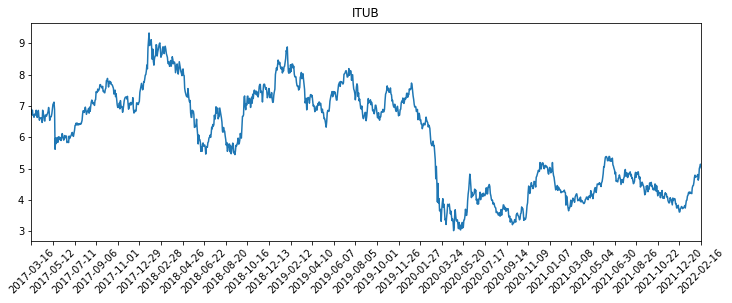

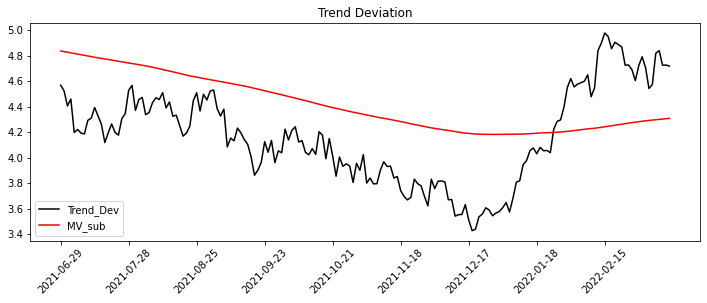

In [164]:
import numpy as np
import pandas as pd
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
stock = input("Enter the ACT symbol of the stock ")
step = int(input("Enter the months for trend Dev "))
step_sub = int(input("Enter the sub months for trend Dev "))
print('step: ', step)
print('step_sub ', step_sub)
def MV(stock, step):
    mv_step = step
    mv_stock = []
    n = len(stock)
    i = 0
    while i < n - mv_step + 1:
        window_stock = stock[i: i + mv_step]
        mv_stock.append(round(sum(window_stock) / mv_step, 5))
        i += 1
    return mv_stock

yfin.pdr_override()
df_SOFI = pdr.get_data_yahoo(stock)
df_SOFI = df_SOFI.reset_index()
h = len(df_SOFI)
Date = df_SOFI['Date'].dt.strftime('%Y-%m-%d')
Date = np.reshape(Date.to_numpy(),len(Date))
df_SP = pdr.get_data_yahoo('^GSPC')
df_SP = df_SP[-h:]
df_SP = df_SP.reset_index()
stock_close = df_SOFI['Close']
sp_close = df_SP['Close']
stock_close = np.reshape(stock_close.to_numpy(), len(stock_close))
sp_close = np.reshape(sp_close.to_numpy(), len(sp_close))
#This is what need
rs_close = stock_close/sp_close

#MV
step = step*30
step_sub = step_sub*30
MV_stock = MV(stock_close, step)
m = len(MV_stock)
trend_dev = stock_close[-m:]/MV_stock
MV_4 = MV(stock_close,step_sub)
MV_4 = MV_4[-m:]

#plot the result
Date_trend = Date[-m:]
x_close = np.linspace(0,len(stock_close),len(stock_close))
x_trend = x_close[-m:]
plt.figure(figsize = (12,4))
plt.plot(x_close, stock_close)
plt.xlim(210,310)
plt.xticks(x_close[::40], Date[::40], rotation = 45)
plt.title(stock)
plt.show()
plt.figure(figsize = (12,4))
plt.plot(x_trend, trend_dev*np.max(MV_4)**(1.1), color = 'k', label = 'Trend_Dev')
plt.plot(x_trend,MV_4, color = 'r', label = 'MV_sub')
plt.xticks(x_trend[::20], Date_trend[::20], rotation = 45)
plt.title('Trend Deviation')
plt.legend()
plt.show()

In [152]:
a = pd.DataFrame(data = [1,2,3,4], columns = ['a'])
a[-1:]

,a
3,4


In [155]:
np.av*?